In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [43]:
def cconv(x, y):
    assert len(x) == len(y)
    d = len(x)
    z = np.zeros(d, dtype=type(x[0]))
    for i in range(d):
        for j in range(d):
            z[i] += y[j] * x[(d + i - j) % d]
    return z

def cconv_inv(x):
    return np.concatenate((x[0:1], x[1:][::-1]))

def cconv_fft(x, y):
    return np.fft.ifft(np.fft.fft(x.flatten()) * np.fft.fft(y.flatten())).reshape(x.shape).real

In [44]:
# Use sympy to check the equation
A, B, C, D, E, F, G, H = sp.symbols('A B C D E F G H')
cconv([A, B, C, D], [E, F, G, H])

array([A*E + B*H + C*G + D*F, A*F + B*E + C*H + D*G,
       A*G + B*F + C*E + D*H, A*H + B*G + C*F + D*E], dtype=object)

In [48]:
cconv(cconv([A, B, C, D], [E, F, G, H]), cconv_inv([A, B, C, D]))

array([A*(A*E + B*H + C*G + D*F) + B*(A*F + B*E + C*H + D*G) + C*(A*G + B*F + C*E + D*H) + D*(A*H + B*G + C*F + D*E),
       A*(A*F + B*E + C*H + D*G) + B*(A*G + B*F + C*E + D*H) + C*(A*H + B*G + C*F + D*E) + D*(A*E + B*H + C*G + D*F),
       A*(A*G + B*F + C*E + D*H) + B*(A*H + B*G + C*F + D*E) + C*(A*E + B*H + C*G + D*F) + D*(A*F + B*E + C*H + D*G),
       A*(A*H + B*G + C*F + D*E) + B*(A*E + B*H + C*G + D*F) + C*(A*F + B*E + C*H + D*G) + D*(A*G + B*F + C*E + D*H)],
      dtype=object)

In [32]:
# Test cconv and cconv_fft being equal
x, y = np.random.uniform(-1, 1, (2, 4))
cconv(x, y), cconv_fft(x, y)

(array([-0.02897581,  0.03715185,  0.23314454,  0.20542173]),
 array([-0.02897581,  0.03715185,  0.23314454,  0.20542173]))

In [33]:
i1 = np.mean(plt.imread('img_01.jpg'), axis=2)
i2 = np.mean(plt.imread('img_02.jpg'), axis=2)

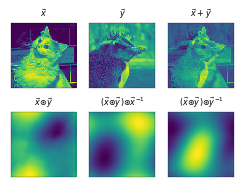

In [79]:
fig, axs = plt.subplots(2, 3, figsize=(4, 3))
axs = axs.flatten()

axs[0].imshow(i1)
axs[0].set_title("$\\vec x$")

axs[1].imshow(i2)
axs[1].set_title("$\\vec y$")

axs[2].imshow(i1 + i2)
axs[2].set_title("$\\vec x + \\vec y$")

axs[3].imshow(cconv_fft(i1, i2))
axs[3].set_title("$\\vec x ⊛ \\vec y$")

axs[4].imshow(cconv_fft(cconv_fft(i1, i2), cconv_inv(i1.flatten())))
axs[4].set_title("$(\\vec x ⊛ \\vec y) ⊛ \\vec x^{-1}$")

axs[5].imshow(cconv_fft(cconv_fft(i1, i2), cconv_inv(i2.flatten())))
axs[5].set_title("$(\\vec x ⊛ \\vec y) ⊛ \\vec y^{-1}$")

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

fig.savefig("../cconv_sim.pdf", bbox_inches='tight', transparent=True)